In [66]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [67]:
def f(x):
    # Funición a evaluar
    # a = (np.e**(-x[0]**2 - x[1]**2))*x[0]
    a = np.cos(x[0])*np.sin(x[1]) + np.cos(x[2])**2
    return a


def grad(x):
    """ Retorna gradiente f"""

    # list1 = [1-2*x[0]**2, -2*x[0]*x[1]]
    # descenso = np.array(list1)*math.e**(-x[0]**2 - x[1]**2)
    descenso = np.array(
        [-np.sin(x[0])*np.sin(x[1]), 
         np.cos(x[0])*np.cos(x[1]), 
         -2*np.sin(x[2])*np.cos(x[2])])
    return descenso


def hessiano(x):
    """Evalua la matriz Hessiana, ingresar derivadas"""
    # axax = -np.sin([x[0]])*np.cos(x[1])
    # # ayay = 
    # # axay = 
    # azaz = 2*np.sin(x[3])**2 - 2*np.cos(x[3])**2
    
    return 1
    # return np.array([
    #     [axax, axay, 0],
    #     [axay, ayay, 0],
    #     [0, 0, azaz]
    # ])


def dirgrad(x):
    """Retorna la dirección del gradiente p"""
    vgrad = grad(x)
    magGrad = np.sqrt(vgrad.dot(vgrad))
    p = -vgrad/magGrad
    return p


def phiAlpha(x0, alpha, p):
    paX = x0 + p * alpha
    return f(paX)


def phipAlpha(x0, alpha, p):
    x = x0 + alpha * p
    vgrad = grad(x)
    return (np.dot(vgrad, p))


def phipp(x0, alpha, p):
    x = x0 + alpha * p
    ahess = hessiano(x)
    return np.dot(np.dot(ahess, p), p)


In [68]:
def cw(x0, p, alpha, c1=1e-4, c2=1):
    """Condiciones de Wolfe"""
    armijo = False
    curvatura = False
    wolfe = False

    recta = phiAlpha(x0, 0, p) + c1*phipAlpha(x0, alpha, p)*alpha

    if phiAlpha(x0, alpha, p) <= recta:
        armijo = True

    if np.abs(phipAlpha(x0, alpha, p)) <= c2*np.abs(phipAlpha(x0, 0, p)):
        curvatura = True

    if curvatura and armijo:
        wolfe = True
    return (wolfe)


def rectaWlf(x0, alpha, p, c1):
    recta = phiAlpha(x0, 0, p) + c1*alpha*phipAlpha(x0, 0, p)
    return recta


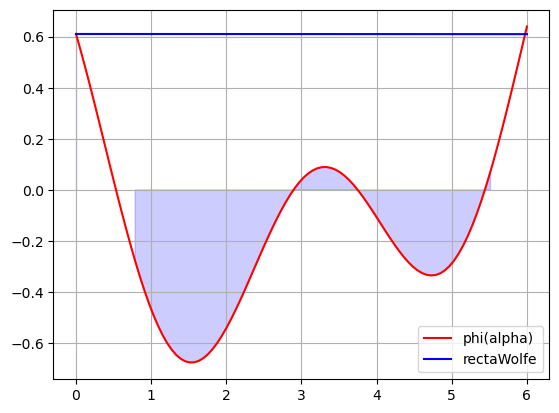

In [74]:
alpha = np.linspace(0, 6, 100)

x0 = np.array([-1, -.3, 0.5])
p = dirgrad(x0)


rectWolfe = []


for i in alpha:
    rectWolfe.append(rectaWlf(x0, i, p, 1e-4,))

condicionesWolfe = []
for i in alpha:
    condicionesWolfe.append(cw(x0, p, i))



def puntos(x0, alfa, p):
    x = x0 + p*alfa
    return f(x)


ppts = []
for i in alpha:
    ppts.append(phiAlpha(x0, i, p))


plt.fill_between(
    x=alpha,
    y1=ppts,
    where=(condicionesWolfe),
    color="b",
    alpha=0.2)


plt.plot(alpha, ppts, 'r', label="phi(alpha)")
plt.plot(alpha, rectWolfe, 'b', label="rectaWolfe")
# plt.plot(alpha, phipp(x0,alpha,p), 'k')
plt.legend()
plt.grid()
plt.show()


In [72]:
print(phipAlpha(x0, 0, p))
print(phipAlpha(x0, 3.2, p))


-1.0180093396705132
0.11511861535544358


In [76]:
print(phiAlpha(x0, 0, p))
print(phiAlpha(x0, 3.2, p))
print(f(x0))
print(p)

0.610480903844319
0.0834950572463582
0.610480903844319
